# 02 Data Wrangling
Notes for improvement:

1. Check how long the missing value drop outs last for.
2. Instead of dropping outliers, cap them at the IQR filter level

# Imports

In [85]:
import pandas as pd
import bamboolib
import numpy as np
import missingno as msno

This data was sourced from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

This dataset is made available under the “Creative Commons Attribution 4.0 International (CC BY 4.0)” license.
## Data Source:
* Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
* Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France

## Data Information:
This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

__Notes:__
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [86]:
energy = pd.read_csv(r'..\data\raw\household_power_consumption.txt', sep=';')

## Feature Descriptions:
1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Missing Data

True to the original dataset's description, about 1.3% of observations are missing across all features except date and time (25,979 observations). The original dataset shows this as NA values for the Sub_metering_3 feature, and as '?' for all other features.

In [87]:
energy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [88]:
missing = pd.concat([energy.isnull().sum().sort_values(ascending = False), 100 * energy.isnull().mean().sort_values(ascending = False)], axis=1)
missing.columns=['count', '%']
print(missing)

                       count         %
Sub_metering_3         25979  1.251844
Date                       0  0.000000
Time                       0  0.000000
Global_active_power        0  0.000000
Global_reactive_power      0  0.000000
Voltage                    0  0.000000
Global_intensity           0  0.000000
Sub_metering_1             0  0.000000
Sub_metering_2             0  0.000000


# Missing At Random

There doesn't appear to be an overall pattern in missing data since the missingness matrix shows missing data both in the earlier years and in the later years, though there is more missing data in the later years. However, on a granular level, these missing observations are clustered together on specific days - that is to say that the readings drop out for more than just a few minutes at a time in some instances. This could be a result of a loss of power or some faulty connection to the meters.

<AxesSubplot:>

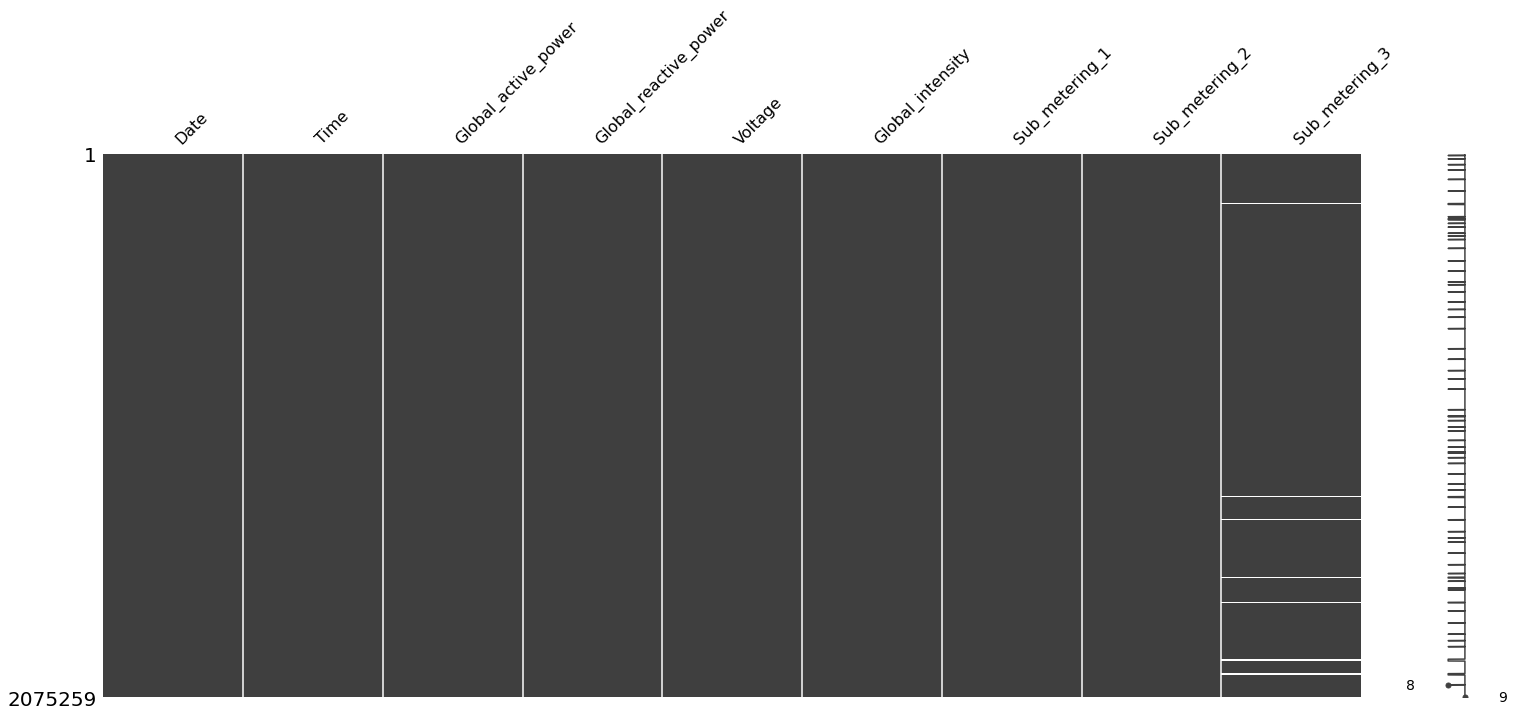

In [89]:
msno.matrix(energy)

# Duplicate Observations

There do not appear to be any duplicate observations in the original dataset.

In [90]:
print(energy[energy.duplicated() == True])

Empty DataFrame
Columns: [Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


# Imputation

In [94]:
energy = energy.replace('?', np.nan)
energy[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = energy[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].fillna(method='ffill')
energy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


# Tidying Data Types

In [95]:
energy['Datetime'] = pd.to_datetime(energy['Date'] + ' ' + energy['Time'], errors='ignore')
energy = energy.drop(columns=['Date', 'Time'])
for column_name in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']:
    energy[column_name] = energy[column_name].astype('float64')
energy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [96]:
energy.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Erroneous Outliers

In [97]:
# Sourced from https://stackoverflow.com/questions/46245035/pandas-dataframe-remove-outliers
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 2 * IQR)) | (df > (Q3 + 2 * IQR)))
    return trueList

In [98]:
outliers = Remove_Outlier_Indices(energy.select_dtypes(include = 'float'))

In [99]:
filtered = energy.drop('Datetime', axis=1)
filtered = filtered[outliers].dropna()
energy = energy.iloc[filtered.index]
energy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
15,3.384,0.282,237.14,14.2,0.0,0.0,17.0,2006-12-16 17:39:00
16,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006-12-16 17:40:00
17,3.430,0.156,237.06,14.4,0.0,0.0,17.0,2006-12-16 17:41:00
18,3.266,0.000,237.13,13.8,0.0,0.0,18.0,2006-12-16 17:42:00
19,3.728,0.000,235.84,16.4,0.0,0.0,17.0,2006-12-16 17:43:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


# Exporting

In [100]:
# save the data to a new csv file
datapath = r'..\data\processed\energy_cleaned.csv'

energy.to_csv(datapath, index = False)